<a href="https://colab.research.google.com/github/matmnds/stud_python/blob/main/e_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Цель анализа:
Выбрать перспективных заказчиков товаров, исходя из суммы, размера и периодичности закупок, расположения, относительно центральных регионов России, выбора поставщиков по регионам России и других стран.

Задачи:
1. Сегментация заказчиков по объему и частоте закупок

Цель: Разделить заказчиков на группы для персонализированного управления.

Ожидаемый результат: 3-5 сегментов (например, «Крупные заказчики», «Мелкие заказчики»).

Решение:
- Кластеризация (k-means, иерархическая).
- Рекомендации по работе с каждой группой.

2. Анализ ассортимента потребностей заказчиков

Цель: определить, какие категории товаров наиболее популярны среди заказчиков для маркетплейсов и какие заказчики закупают самый широкий ассортимент этих товаров.

Ожидаемый результат: список заказчиков с самым широким ассортиментом для закупки товаров, а также список самых популярных категорий товаров заказчиков.

Структура решения: сбор данных об ассортименте товаров у разных заказчиков, анализ популярности товаров на маркетплейсах, сравнение ассортимента заказчиков и определение лидеров по широте ассортимента популярных товаров.

3. Сегментация заказчиков по территориальному выбору закупок

Цель: отобразить территориальный выбор предложений заказчиками от поставщиков.

Ожидаемый результат: список сегментов

Структура решения: сбор данных о территориальном выборе поставщиков заказчиками, сравнение регионов доставки (вся Россия, ближайшие регионы и т.д.), анализ факторов, влияющих на выбор регионов.


In [ ]:
import pandas as pd

df = pd.read_csv('taskSupl.csv')

# Просмотр структуры данных
print(df.shape)
df.head()

(193, 11)


,Заказчик,Дата заказа,Заголовок заказа,Описание заказа,Размер заказа,Рубрики,Регионы,Город поставки,Победившая компания,Город победителя,Закрыт ли заказ
0,2260116,30-04-2025 09:55,Требуется листовой чай для продажи на маркетпл...,Требуется листовой чай для продажи на маркетпл...,Мелкий,Травяной чай,"Северо-Западный федеральный округ, Центральный...",Краснодар,"ООО ""ЧАЙНЫЙ ЛИСТ""",Москва,Да
1,2316696,07-04-2025 06:11,Требуется производство по пошиву одежды из дже...,Требуется производство по пошиву одежды из дже...,Крупный,Женская одежда,Кыргызстан,Санкт-Петербург,ТОО «TWINS TEXTILE (ТВИНС ТЕКСТИЛЬ)»,Алматы,Да
2,2312826,01-04-2025 13:28,Требуется мебель корпусная в ассортименте для ...,Требуется мебель корпусная в ассортименте для ...,Мелкий,Мебель корпусная,"Приволжский федеральный округ, Центральный фед...",Таганрог,ИП Торопцева Мария Петровна,Пенза,Да
3,2306581,02-03-2025 20:56,Требуются Wi-Fi роутеры для продажи на маркетп...,Требуются Wi-Fi роутеры для продажи на маркетп...,Средний,Маршрутизаторы,"Приволжский федеральный округ, Нижегородская о...",Нижний Новгород,"ТД ""СИМА-ЛЕНД"" (ООО ""СИМАОПТ"")",Екатеринбург,Да
4,2303600,20-02-2025 04:00,Требуются запчасти для грузовых автомобилей дл...,Требуются запчасти для грузовых автомобилей дл...,Крупный,Автозапчасти для грузовых автомобилей,"Дальневосточный федеральный округ, Сибирский ф...",Новосибирск,"ООО ""ЭВЕРЕСТ""",Хабаровск,Да


In [ ]:
# Привожу названия столбцов к удобному формату
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Группировка: кол-во заказов и распределение по размеру
grouped = df.groupby('Заказчик').agg({
    'Дата_заказа': 'count',
    'Размер_заказа': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]
}).rename(columns={'Дата_заказа': 'Частота_заказов'})

grouped.head()

,Частота_заказов,Размер_заказа
Заказчик,,
1574039,1,Мелкий
1619101,1,Крупный
1628720,1,Очень крупный
1660284,1,Средний
1666345,1,Мелкий


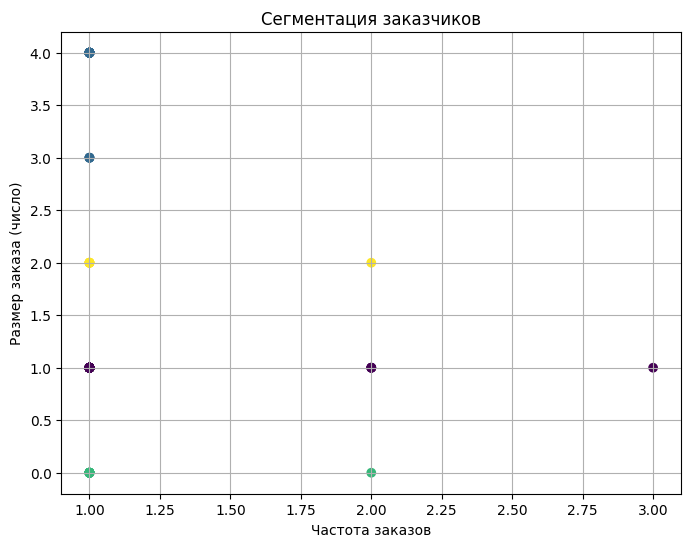

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Кодирую размер заказа
size_encoder = LabelEncoder()
grouped['Размер_заказа_число'] = size_encoder.fit_transform(grouped['Размер_заказа'])

# KMeans кластеризация
X = grouped[['Частота_заказов', 'Размер_заказа_число']]
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
grouped['Кластер'] = kmeans.labels_

# Визуализация
plt.figure(figsize=(8,6))
plt.scatter(X['Частота_заказов'], X['Размер_заказа_число'], c=grouped['Кластер'], cmap='viridis')
plt.xlabel('Частота заказов')
plt.ylabel('Размер заказа (число)')
plt.title('Сегментация заказчиков')
plt.grid(True)
plt.show()

На графике представлена кластеризация заказчиков по двум признакам:

Частота заказов (ось X)

Размер заказа (ось Y, числовое представление)

**Наблюдения:**

Разделение на сегменты чётко прослеживается:

Кластер с высокими размерами заказов, но низкой частотой — возможно, крупные клиенты, делающие редкие, но объёмные закупки.

Кластер с низкой частотой и маленьким размером заказов — это, скорее всего, мелкие клиенты с нерегулярными покупками.

Есть группа клиентов со средним размером и частотой — возможно, перспективные заказчики, к которым можно применить стимулирующие меры (скидки, спецпредложения).



In [ ]:
# Уникальные рубрики по заказчику
assortment = df.groupby('Заказчик').agg({
    'Рубрики': pd.Series.nunique
}).rename(columns={'Рубрики': 'Широта_ассортимента'}).sort_values(by='Широта_ассортимента', ascending=False)

# Топ-10 заказчиков по широте ассортимента
print(assortment.head(10))

# Популярность категорий в целом
popular_categories = df['Рубрики'].value_counts().head(10)
print(popular_categories)

          Широта_ассортимента
Заказчик                     
1957470                     2
1995624                     2
2002595                     2
2048755                     2
2017248                     2
2281339                     2
1697307                     1
1619101                     1
1666345                     1
1852613                     1
Рубрики
Женская одежда                      12
Чулочно-носочные изделия             8
Хозяйственные товары                 7
Бытовая химия                        7
Уходовая косметика                   6
Одежда                               6
Интимные товары                      5
Аксессуары к мобильным телефонам     4
Корм для животных                    4
Белье женское                        4
Name: count, dtype: int64


In [ ]:
# Привожу регионы к списку
df['Регион_список'] = df['Регионы'].str.split(',')

# Кол-во уникальных регионов на заказчика
territory = df.explode('Регион_список').groupby('Заказчик')['Регион_список'].nunique()
territory = territory.rename('Уникальные_регионы').sort_values(ascending=False)

# Сегментация по регионам
territory.describe()

,Уникальные_регионы
count,185.000000
mean,4.405405
std,2.405377
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,14.000000


In [ ]:
# Кластеризация по территориальному охвату
from sklearn.preprocessing import StandardScaler

X_territory = territory.to_frame()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_territory)

kmeans = KMeans(n_clusters=3, random_state=1).fit(X_scaled)
X_territory['Кластер'] = kmeans.labels_

print(X_territory.groupby('Кластер').mean())

         Уникальные_регионы
Кластер                    
0                  3.371622
1                  7.166667
2                  9.842105


In [ ]:
# Привежу названия колонки с заказчиком к строковому типу (на всякий случай)
df['Заказчик'] = df['Заказчик'].astype(str)

# Разделю регионы (они перечислены через запятую) и посчитаю уникальные регионы для каждого заказчика
df['Регионы'] = df['Регионы'].fillna('').astype(str)

# Разделю регионы и создам отдельные строки для каждого региона
df_regions_exploded = df.assign(Регион_один=df['Регионы'].str.split(',')).explode('Регион_один')

# Очищу пробелы
df_regions_exploded['Регион_один'] = df_regions_exploded['Регион_один'].str.strip()

# Группировка: сколько уникальных регионов у каждого заказчика
region_counts = (
    df_regions_exploded
    .groupby('Заказчик')['Регион_один']
    .nunique()
    .reset_index()
    .rename(columns={'Регион_один': 'Уникальные_регионы'})
)

# Добавлю сортировку по убыванию — рейтинг
region_counts_sorted = region_counts.sort_values(by='Уникальные_регионы', ascending=False).reset_index(drop=True)

# Вывод топ-10
region_counts_sorted.head(10)

,Заказчик,Уникальные_регионы
0,2276106,14
1,2078875,12
2,2002595,10
3,1697307,10
4,2253977,10
5,2107873,10
6,2129849,10
7,2251493,10
8,1666345,10
9,2197734,10


На основе анализа количества уникальных регионов, с которыми работают заказчики, были выявлены топ-10 самых географически активных клиентов.

Лидер: заказчик 2276106 охватывает 14 различных регионов — это наиболее перспективный клиент с точки зрения масштабируемости и логистических возможностей.

Следом идут заказчики 2078875 (12 регионов) и группа из 8 заказчиков, каждый из которых охватывает 10 регионов.

Такие заказчики имеют высокий потенциал для расширения сотрудничества на федеральном уровне и являются приоритетными для целевых предложений и долгосрочного партнёрства.

/tmp/ipython-input-10-1593827162.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


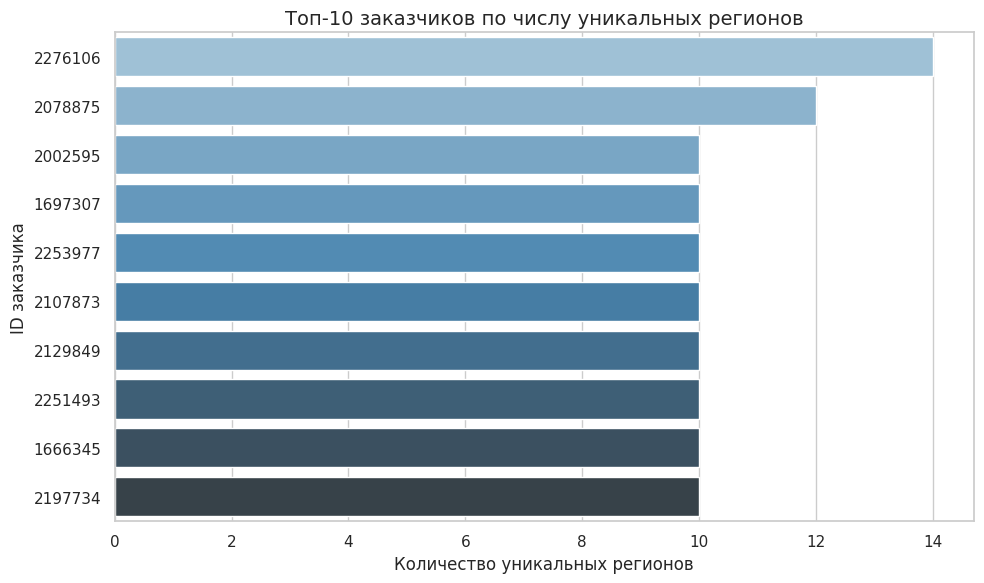

In [ ]:
import seaborn as sns

# Убеждаюсь, что данные отсортированы
top_10_regions = region_counts_sorted.head(10)

# Устанавливаю стиль
sns.set(style="whitegrid")

# Строю горизонтальный barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_regions,
    y='Заказчик',
    x='Уникальные_регионы',
    palette='Blues_d'
)

# Подписи и оформление
plt.title('Топ-10 заказчиков по числу уникальных регионов', fontsize=14)
plt.xlabel('Количество уникальных регионов')
plt.ylabel('ID заказчика')
plt.tight_layout()
plt.show()